In [8]:
import os
import h5py
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
load_dotenv()


True

In [10]:
data_path = Path(os.getenv('DATA'))

In [14]:
h5_path = data_path/'interim/petct/TUE0000ALLDS_2D.h5'

In [60]:
with h5py.File(h5_path, 'r') as hf:
    id = 7000 # 7000, 7020  # normal 500
    img = hf['image'][id]
    mask = hf['mask'][id]

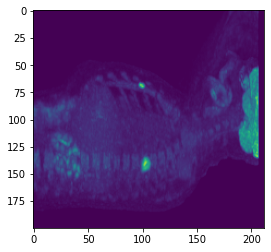

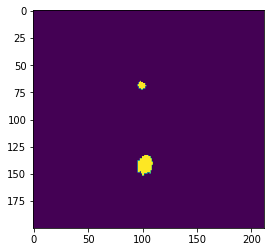

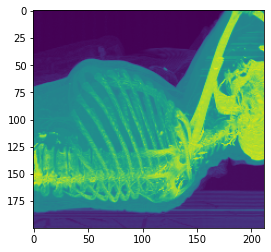

In [62]:
plt.imshow(img[0], vmin=0.01, vmax=0.5)
plt.show()
plt.imshow(mask[0])
plt.show()
plt.imshow(img[1])
plt.show()
